In [1]:
!pip install googletrans==4.0.0-rc1

In [2]:
!pip install gTTS

In [3]:
!pip install transformers torch torchvision torchaudio

In [4]:
!pip install transformers==4.28.0 accelerate bitsandbytes

In [5]:
!pip install pillow

In [6]:
!pip install speechrecognition

📷 Upload a crop image:


Saving yellow.jpg to yellow.jpg


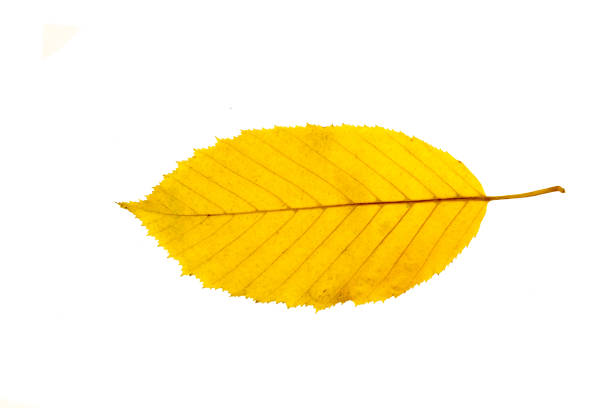

In [29]:
# Step 2: Upload Crop Image
from google.colab import files
from PIL import Image
from IPython.display import display

print("📷 Upload a crop image:")
image_upload = files.upload()
image_path = list(image_upload.keys())[0]
image = Image.open(image_path).convert("RGB")
display(image)


In [30]:
# Step 3: Run CNN-based Captioning on Image + Voice Output
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from gtts import gTTS
from IPython.display import Audio

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load BLIP model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)

# Process and generate caption
inputs = processor(images=image, return_tensors="pt").to(device)
with torch.no_grad():
    output = model.generate(**inputs)

# Decode caption
caption = processor.decode(output[0], skip_special_tokens=True)
print("📝 Image Caption:", caption)

# Convert caption to voice
tts = gTTS(text="This image looks like " + caption, lang='en')
tts.save("caption_audio.mp3")

# Play the audio
Audio("caption_audio.mp3", autoplay=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


📝 Image Caption: a single yellow leaf on a white background


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.0/110.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.6 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.1
    Uninstalling tokenizers-0.21.1:
      Successfully uninstalled tokenizers-0.21.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.52.4
    Uninstalling transformers-4.52.4:
      Successfully uninstalled transformers-4.52.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 4.1.0 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.28.0 which is incompatible.


In [11]:
!pip install "transformers[torch]" "accelerate" "bitsandbytes" "Pillow" "speechrecognition" "googletrans==4.0.0-rc1" "gTTS"

In [15]:
!pip install pydub